### Importing dataset

In [1]:
import pandas as pd

In [2]:
dataTrain = pd.read_csv("../Google_Stock_Price_Train.csv")
dataTest = pd.read_csv("../Google_Stock_Price_Test.csv")

In [3]:
dataTrain.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataTrain.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
dataTest.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Visulizing the dataset

In [6]:
import matplotlib.pyplot as plt

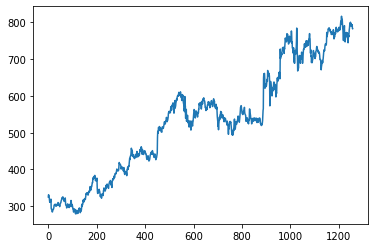

In [7]:
plt.plot(dataTrain.Open)

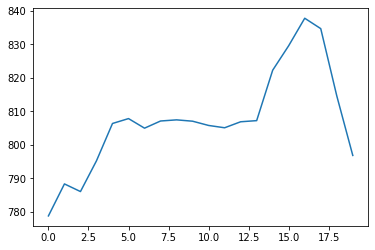

In [8]:
plt.plot(dataTest.Open)

### Extracting dataset for training

In [9]:
training_set = dataTrain.iloc[:,1:2].values

In [10]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler(feature_range=(0,1))

In [13]:
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [15]:
# len(training_set_scaled)

### Creating data structure with timestampts and output

In [16]:
X_train = []
y_train = []

In [17]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [18]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train[1][-1]

0.08627874097775134

In [20]:
y_train[2]

0.07454051640747084

In [21]:
training_set_scaled[62]

array([0.07454052])

In [22]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [23]:
X_train.shape

(1198, 60)

In [24]:
X_train = np.reshape(X_train, (1198,60,1))

In [25]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Building a RNN

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [178]:
droput_rate = 0.1

In [179]:
# Initializing the RNN
regressor = Sequential()

In [180]:
# Adding LSTM 
regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (60,1)))
# Adding Droput
regressor.add(Dropout(rate = droput_rate))

In [181]:
# Adding a second LSTM 
regressor.add(LSTM(units = 100, return_sequences=True))
# Adding Droput
regressor.add(Dropout(rate = droput_rate))

In [182]:
# Adding a second LSTM 
regressor.add(LSTM(units = 100, return_sequences=True))
# Adding Droput
regressor.add(Dropout(rate = droput_rate))

In [183]:
# Adding a third LSTM 
regressor.add(LSTM(units = 100, return_sequences=True))
# Adding Droput
regressor.add(Dropout(rate = droput_rate))

In [184]:
# Adding a fourth LSTM 
regressor.add(LSTM(units = 100, return_sequences=False))
# Adding Droput
regressor.add(Dropout(rate = droput_rate))

In [185]:
# Adding a output layer
regressor.add(Dense(units = 1))

In [186]:
# Compiling the RNN

In [187]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [188]:
# Fitting the RNN

In [189]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0483
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0053
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0034
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0033
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0034
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0032
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0028
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0030
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0027
Epoch 11/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0027
Epoch 12/100
1198/1198 [==============================] - 11s 

1198/1198 [==============================] - 11s 9ms/step - loss: 8.4061e-04
Epoch 96/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.7699e-04
Epoch 97/100
1198/1198 [==============================] - 12s 10ms/step - loss: 9.9014e-04
Epoch 98/100
1198/1198 [==============================] - 12s 10ms/step - loss: 8.8734e-04
Epoch 99/100
1198/1198 [==============================] - 12s 10ms/step - loss: 9.7214e-04
Epoch 100/100
1198/1198 [==============================] - 11s 9ms/step - loss: 9.6039e-04


In [39]:
# reg20 = regressor

### Extracting data for test

In [190]:
test_set = dataTest.iloc[:,1:2].values

test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [191]:
dataset_total = pd.concat((dataTrain['Open'], dataTest['Open']), axis = 0)

In [192]:
inputs = dataset_total[len(dataset_total)-len(dataTest)-60:].values

In [193]:
inputs = inputs.reshape(-1,1)

In [194]:
inputs = sc.transform(inputs)

In [195]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [196]:
X_test = np.array(X_test)

In [171]:
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [172]:
X_test.shape

(20, 60)

In [197]:
X_test = np.reshape(X_test, (20,60, 1))

In [150]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [163]:
X_test = np.reshape(X_test[1],(1,60,1))

In [198]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[789.69904],
       [787.0986 ],
       [791.29504],
       [791.29663],
       [795.4416 ],
       [802.6429 ],
       [804.8518 ],
       [803.20447],
       [804.0862 ],
       [805.06445],
       [805.45953],
       [805.1973 ],
       [805.1117 ],
       [806.4583 ],
       [807.269  ],
       [816.21344],
       [822.6752 ],
       [828.4532 ],
       [827.76495],
       [816.5852 ]], dtype=float32)

In [138]:
for i in range(0,58):
    X_test[0][i][0] = X_test[0][i+1][0]
        
    X_test[0][59][0] = predicted_stock_price[0][0]

In [165]:
X_t = X_test.copy()
X_t

array([[[0.93113327],
        [0.92750577],
        [0.94415507],
        [0.93876032],
        [0.93403527],
        [0.93483518],
        [0.9313937 ],
        [0.94636878],
        [0.96569685],
        [0.97510976],
        [0.95966962],
        [0.97808617],
        [1.        ],
        [0.98076494],
        [0.97083116],
        [0.98450406],
        [0.96054394],
        [0.9371419 ],
        [0.92841729],
        [0.90804747],
        [0.8771858 ],
        [0.92153434],
        [0.93809063],
        [0.93165414],
        [0.95254483],
        [0.88812412],
        [0.88637547],
        [0.87032145],
        [0.88563137],
        [0.90743359],
        [0.91571173],
        [0.89941588],
        [0.91805566],
        [0.9089404 ],
        [0.9024853 ],
        [0.89456061],
        [0.91600938],
        [0.9132934 ],
        [0.88979835],
        [0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0.91777662],
        [0.93176576],
        [0

In [166]:
predicted = []
for i in range(0,20):
    predicted_stock_price = regressor.predict(X_t)
    predicted.append(sc.inverse_transform(predicted_stock_price))
    
    for i in range(0,58):
        X_t[0][i][0] = X_t[0][i+1][0]
        
    X_t[0][59][0] = predicted_stock_price[0][0]

    

In [168]:
predicted

[array([[788.165]], dtype=float32),
 array([[791.0649]], dtype=float32),
 array([[791.876]], dtype=float32),
 array([[791.92944]], dtype=float32),
 array([[791.6741]], dtype=float32),
 array([[791.3102]], dtype=float32),
 array([[790.9511]], dtype=float32),
 array([[790.658]], dtype=float32),
 array([[790.45386]], dtype=float32),
 array([[790.3371]], dtype=float32),
 array([[790.2936]], dtype=float32),
 array([[790.3057]], dtype=float32),
 array([[790.3553]], dtype=float32),
 array([[790.42725]], dtype=float32),
 array([[790.5118]], dtype=float32),
 array([[790.6008]], dtype=float32),
 array([[790.6879]], dtype=float32),
 array([[790.7708]], dtype=float32),
 array([[790.84705]], dtype=float32),
 array([[790.91504]], dtype=float32)]

In [153]:
predicted

[array([[790.927]], dtype=float32),
 array([[792.76324]], dtype=float32),
 array([[792.9841]], dtype=float32),
 array([[792.82214]], dtype=float32),
 array([[792.5204]], dtype=float32),
 array([[792.1414]], dtype=float32),
 array([[791.7446]], dtype=float32),
 array([[791.3874]], dtype=float32),
 array([[791.10736]], dtype=float32),
 array([[790.9176]], dtype=float32),
 array([[790.8125]], dtype=float32),
 array([[790.77704]], dtype=float32),
 array([[790.7941]], dtype=float32),
 array([[790.8459]], dtype=float32),
 array([[790.9186]], dtype=float32),
 array([[791.003]], dtype=float32),
 array([[791.0913]], dtype=float32),
 array([[791.17773]], dtype=float32),
 array([[791.2597]], dtype=float32),
 array([[791.3356]], dtype=float32)]

In [123]:
X_test[0][59][0]

0.9368814643946723

In [176]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [159]:
predicted

[array([[790.927]], dtype=float32),
 array([[792.76324]], dtype=float32),
 array([[792.9841]], dtype=float32),
 array([[792.82214]], dtype=float32),
 array([[792.5204]], dtype=float32),
 array([[792.1414]], dtype=float32),
 array([[791.7446]], dtype=float32),
 array([[791.3874]], dtype=float32),
 array([[791.10736]], dtype=float32),
 array([[790.9176]], dtype=float32),
 array([[790.8125]], dtype=float32),
 array([[790.77704]], dtype=float32),
 array([[790.7941]], dtype=float32),
 array([[790.8459]], dtype=float32),
 array([[790.9186]], dtype=float32),
 array([[791.003]], dtype=float32),
 array([[791.0913]], dtype=float32),
 array([[791.17773]], dtype=float32),
 array([[791.2597]], dtype=float32),
 array([[791.3356]], dtype=float32)]

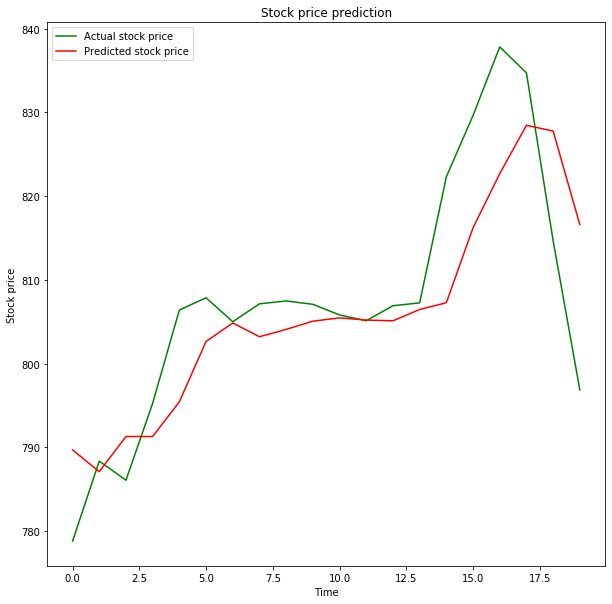

In [203]:
plt.figure(figsize=(10,10))
plt.plot(dataTest.Open, label = "Actual stock price", color = "green")
plt.plot(predicted_stock_price ,label= "Predicted stock price", color = "red")
plt.title("Stock price prediction")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.savefig('stock.png')
plt.show()